# SI 370 - Homework #5: Classifiers
or: How I Learned to Stop Worrying and Love Machine Learning

Version 2023.11.06.1.CT

This is, perhaps, one of the most exciting homework assignments that you have
encountered in this course!

Similar to what we introduced you to last class, you are going to try your hand at a Kaggle competition to predict which passengers onboard the Spaceship Titanic will be transported to an alternate dimension.

(NOTE: if you prefer to not submit your work to the Kaggle competition that's fine --
just contact Chris via email (cteplovs@umich.edu) and we will work out an alternative.)

To start navigate to the [Spaceship Titanic](https://www.kaggle.com/competitions/spaceship-titanic) project page.

The basic steps for this assignment were outlined in the video from last class:

1. Accept the rules and join the competition
2. Download the data (from the data tab of the competition page)
3. Understand the problem
4. EDA (Exploratory Data Analysis)
5. Train, tune, and ensemble (!) your machine learning models
6. Upload your prediction as a submission on Kaggle and receive an accuracy score

additionally, you will

7. Upload your final notebook to Canvas and report your best accuracy score.  

Note that class grades are not entirely dependent on your accuracy score.  
All models that achieve 80% accuracy will receive full points for 
the accuracy component of this assignment.

Some additional notes:

1. If you use another notebook, code, or approaches be sure to reference the original work. (Note that we recommend you study existing Kaggle notebooks before starting your own work.)
2. If you use ChatGPT, or any other generative AI helper, be sure to reference that as well.
3. You can help each other but in the end you must submit your own work, both to Kaggle and to Canvas.

Some additional resources:

* "ensemble" your models with a [VotingClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.VotingClassifier.html)
* a good primer on [feature engineering](https://triangleinequality.wordpress.com/2013/09/08/basic-feature-engineering-with-the-titanic-data/)
* There are a lot of good [notebooks to study](https://www.kaggle.com/competitions/spaceship-titanic/code) (check the number of upvotes to help guide your exploration)

## GOOD LUCK!
(and don't cheat... cheating on this assignment will result in a grade of zero.)

One final note:  Your submission should be a self-contained notebook that is NOT based
on this one.  Studying the existing Kaggle competition notebooks should 
give you a sense of what makes a "good" notebook.

higher accuracy classifiers are at the bottom: voting_classifier_4 and voting_clf

In [1]:
import pandas as pd

In [32]:
#you are challenged to predict which passengers were transported by the anomaly using records recovered from the spaceship’s damaged computer system

test=pd.read_csv('test.csv')
train=pd.read_csv('train.csv')

In [29]:
train.describe()

#can show us how we should fill in nan. for example since minimum values for roomservice, foodcourt, shoppingmall, spa, and vrdeck are 0, we should try to fill in values here that are not overexaggerating what people could have spent. 
#makes more sense to use median than mean since mean is more sensitive to outliers

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [30]:
test.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,4186.000000,4195.000000,4171.000000,4179.000000,4176.000000,4197.000000
mean,28.658146,219.266269,439.484296,177.295525,303.052443,310.710031
std,14.179072,607.011289,1527.663045,560.821123,1117.186015,1246.994742
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,37.000000,53.000000,78.000000,33.000000,50.000000,36.000000
max,79.000000,11567.000000,25273.000000,8292.000000,19844.000000,22272.000000


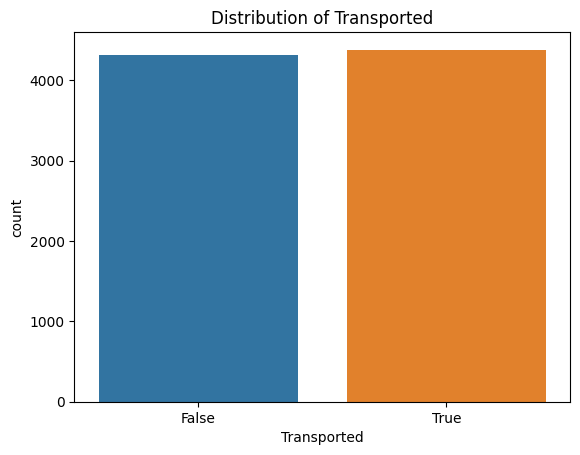

In [31]:
#EDA
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Transported', data=train)
plt.title('Distribution of Transported')
plt.show()

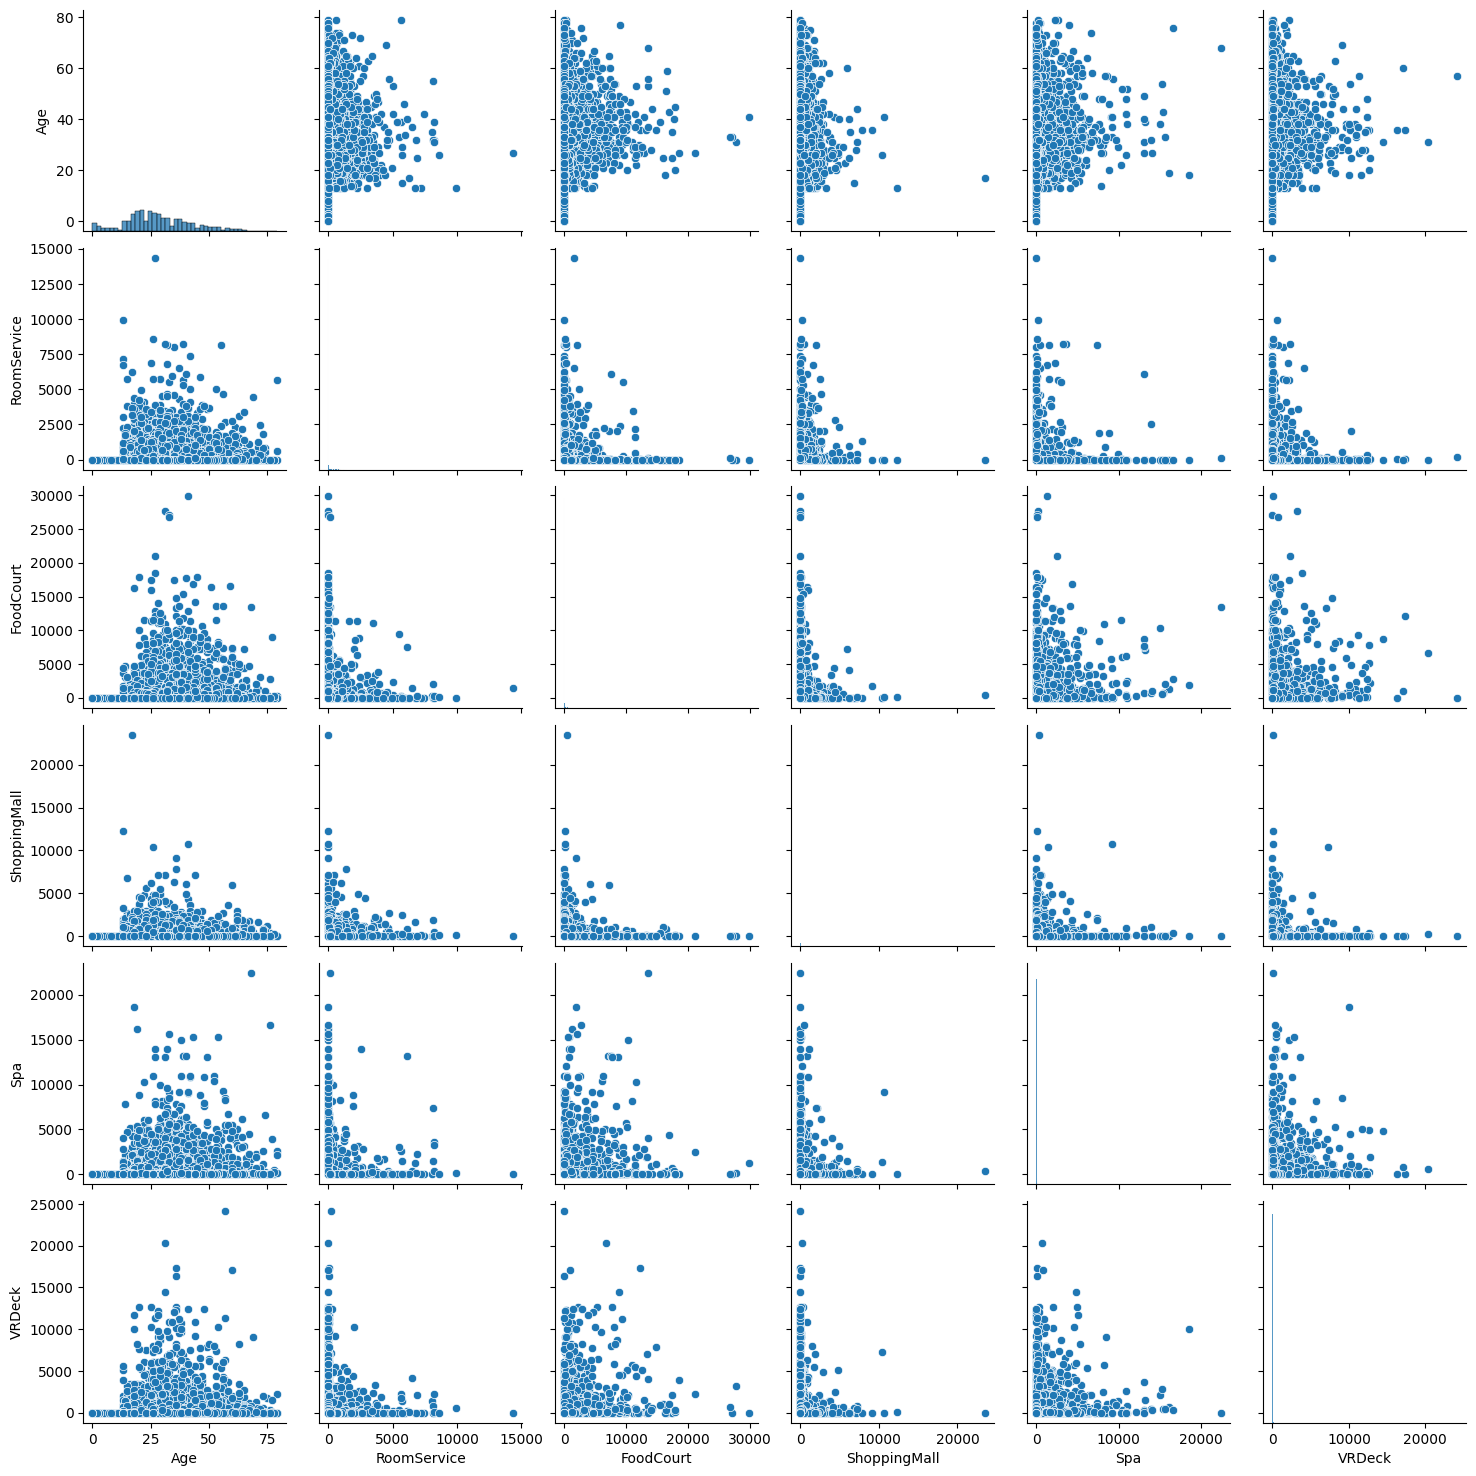

In [4]:
numeric_cols = train.select_dtypes(include=['float64']).columns
sns.pairplot(train[numeric_cols])

<Axes: xlabel='Age', ylabel='Count'>

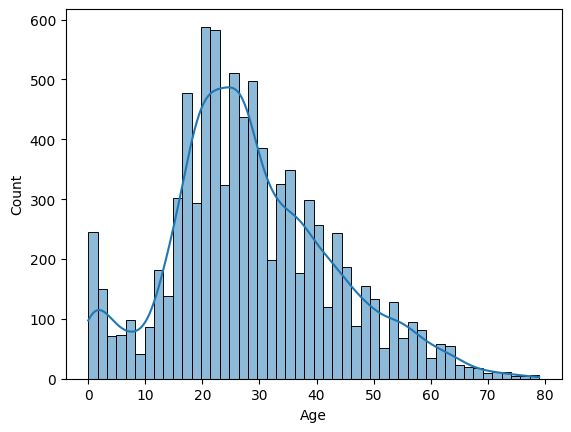

In [82]:
#histogram code
import seaborn as sns
sns.histplot(train['Age'], kde=True)

It looks like the age distribution is concentrated from 20-30, suggesting our median and mode fall within this range

<Axes: xlabel='Transported', ylabel='Count'>

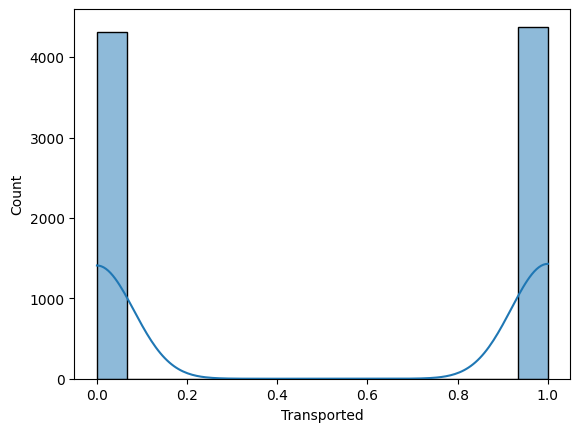

In [83]:
sns.histplot(train['Transported'], kde=True)

The amount of people transported is similar to the amount of people who were not transported

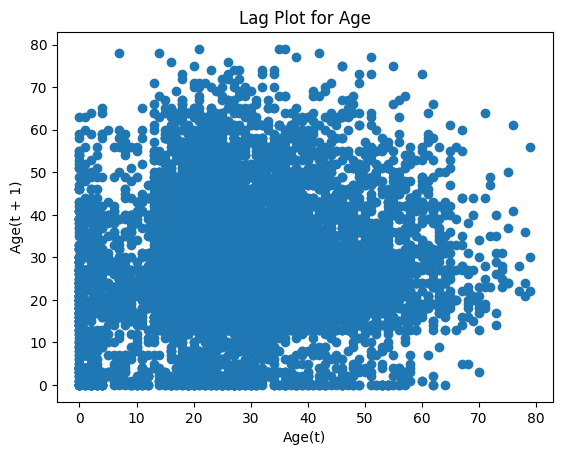

AttributeError: module 'seaborn' has no attribute 'lagplot'

In [85]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import lag_plot



train_age_cleaned = train['Age'].dropna()

lag_plot(train_age_cleaned)


plt.title('Lag Plot for Age')
plt.xlabel('Age(t)')
plt.ylabel('Age(t + 1)')

plt.show()
sns.lagplot(train['Age'])

the points in the lag plot are scattered randomly, suggesting that the data is relatively uncorrelated with its lagged values.

<Axes: xlabel='Transported', ylabel='Age'>

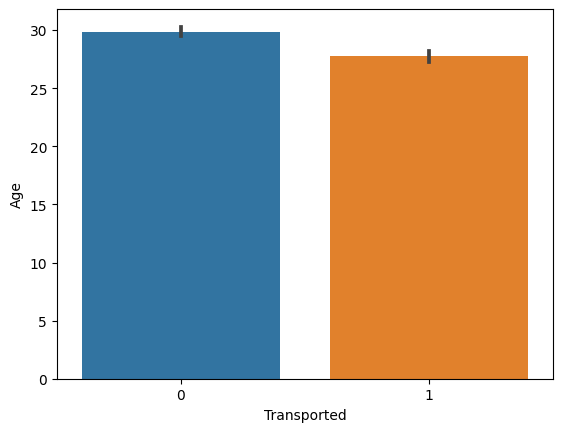

In [87]:
sns.barplot(x='Transported', y='Age', data=train)

Age may have some effect on whether or not a person was transported

HANDLING MISSING VALUES

PassengerId ,HomePlanet, CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported


RoomService, FoodCourt, ShoppingMall, Spa, VRDeck - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.

In [3]:
print(test.isnull().sum())

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64


In [4]:
print(train.isnull().sum())

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64


In [33]:
train['GroupNum']=train['PassengerId'].apply(lambda x: int(x.split('_')[0]))
test['GroupNum']=test['PassengerId'].apply(lambda x: int(x.split('_')[0])) 



#THIS WAS ADDED AFTER FAILING TO GET 0.8 ACCURACY 

In [33]:
train

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,GroupNum
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,1
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,2
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,3
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,3
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False,9276
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False,9278
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True,9279
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False,9280


In [34]:
#home planet

train['HomePlanet'].fillna(train['HomePlanet'].mode()[0], inplace=True)
test['HomePlanet'].fillna(test['HomePlanet'].mode()[0], inplace=True)   

In [35]:
#age
median_age=train['Age'].median()
train.Age=train.Age.fillna(median_age)

In [36]:
median_age_test=test['Age'].median()
test.Age=test.Age.fillna(median_age_test)

In [37]:
#cryosleep
train['CryoSleep'].fillna(train['CryoSleep'].mode()[0], inplace=True)
test['CryoSleep'].fillna(test['CryoSleep'].mode()[0], inplace=True)

In [50]:
#cabin

train['Cabin'].fillna(train['Cabin'].mode()[0], inplace=True)
test['Cabin'].fillna(test['Cabin'].mode()[0], inplace=True)

train['Side']=train['Cabin'].apply(lambda x: x.split('/')[2])
test['Side']=test['Cabin'].apply(lambda x: x.split('/')[2])

train['Deck']=train['Cabin'].apply(lambda x: x.split('/')[0])
test['Deck']=test['Cabin'].apply(lambda x: x.split('/')[0])

In [51]:
train

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,GroupNum,Side,Deck
0,0001_01,Europa,0,B/0/P,TRAPPIST-1e,39.0,0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,0,1,P,B
1,0002_01,Earth,0,F/0/S,TRAPPIST-1e,24.0,0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,1,2,S,F
2,0003_01,Europa,0,A/0/S,TRAPPIST-1e,58.0,1,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,0,3,S,A
3,0003_02,Europa,0,A/0/S,TRAPPIST-1e,33.0,0,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,0,3,S,A
4,0004_01,Earth,0,F/1/S,TRAPPIST-1e,16.0,0,303.0,70.0,151.0,565.0,2.0,Willy Santantines,1,4,S,F
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,0,A/98/P,55 Cancri e,41.0,1,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,0,9276,P,A
8689,9278_01,Earth,1,G/1499/S,PSO J318.5-22,18.0,0,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,0,9278,S,G
8690,9279_01,Earth,0,G/1500/S,TRAPPIST-1e,26.0,0,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,1,9279,S,G
8691,9280_01,Europa,0,E/608/S,55 Cancri e,32.0,0,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,0,9280,S,E


In [52]:
#destination
train['Destination'].fillna(train['Destination'].mode()[0], inplace=True)
test['Destination'].fillna(test['Destination'].mode()[0], inplace=True)

In [53]:
#VIP             203
train['VIP'].fillna(train['VIP'].mode()[0], inplace=True)
test['VIP'].fillna(test['VIP'].mode()[0], inplace=True)

In [54]:
#RoomService     
med_RoomService=train['RoomService'].median()
med_rs_test=test['RoomService'].median()

train.RoomService=train.RoomService.fillna(med_RoomService)
test.RoomService=test.RoomService.fillna(med_rs_test)

In [56]:
#FoodCourt        
med_food=train['FoodCourt'].median()
med_fc_test=test['FoodCourt'].median()

train.FoodCourt=train.FoodCourt.fillna(med_food)
test.FoodCourt=test.FoodCourt.fillna(med_fc_test)


In [57]:
#shopping 

med_shopping=train['ShoppingMall'].median()
med_shopping_test=test['ShoppingMall'].median()

train.ShoppingMall=train.ShoppingMall.fillna(med_shopping)
test.ShoppingMall=test.ShoppingMall.fillna(med_shopping_test)

In [58]:
#spa
med_spa=train['Spa'].median()
med_spa_test=test['Spa'].median()

train.Spa=train.Spa.fillna(med_spa)
test.Spa=test.Spa.fillna(med_spa_test)

In [59]:
#vr deck and name

med_vr_deck=train['VRDeck'].median()
med_vr_deck_test=test['VRDeck'].median()
train.VRDeck=train.VRDeck.fillna(med_vr_deck)
test.VRDeck=test.VRDeck.fillna(med_vr_deck_test)

train['Name'].fillna('Unknown', inplace=True)
test['Name'].fillna('Unknown', inplace=True)

In [25]:
train

,PassengerId,CryoSleep,Cabin,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,GroupNum,HomePlanet_Europa,HomePlanet_Mars,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,Side_S
0,0001_01,0,B/0/P,39.0,0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,0,1,1,0,0,1,0
1,0002_01,0,F/0/S,24.0,0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,1,2,0,0,0,1,1
2,0003_01,0,A/0/S,58.0,1,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,0,3,1,0,0,1,1
3,0003_02,0,A/0/S,33.0,0,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,0,3,1,0,0,1,1
4,0004_01,0,F/1/S,16.0,0,303.0,70.0,151.0,565.0,2.0,Willy Santantines,1,4,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,0,A/98/P,41.0,1,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,0,9276,1,0,0,0,0
8689,9278_01,1,G/1499/S,18.0,0,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,0,9278,0,0,1,0,1
8690,9279_01,0,G/1500/S,26.0,0,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,1,9279,0,0,0,1,1
8691,9280_01,0,E/608/S,32.0,0,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,0,9280,1,0,0,0,1


In [60]:
#  One-hot encode 'HomePlanet', 'Destination', 'Side','Deck'
train = pd.get_dummies(train, columns=['HomePlanet'], prefix='HomePlanet', drop_first=True)
test = pd.get_dummies(test, columns=['HomePlanet'], prefix='HomePlanet', drop_first=True)

train = pd.get_dummies(train, columns=['Destination'], prefix='Destination', drop_first=True)
test = pd.get_dummies(test, columns=['Destination'], prefix='Destination', drop_first=True)

train = pd.get_dummies(train, columns=['Side'], prefix='Side', drop_first=True)
test = pd.get_dummies(test, columns=['Side'], prefix='Side', drop_first=True)

train=pd.get_dummies(train, columns=['Deck'], prefix='Deck', drop_first=True)   
test=pd.get_dummies(test, columns=['Deck'], prefix='Deck', drop_first=True)

In [61]:
# convert VIP , CryoSleep, Transported to binary
train['VIP'] = train['VIP'].astype(int)
train['Transported'] = train['Transported'].astype(int)
train['CryoSleep'] = train['CryoSleep'].astype(int)


test['CryoSleep'] = test['CryoSleep'].astype(int)
test['VIP'] = test['VIP'].astype(int)


In [62]:
train.columns

Index(['PassengerId', 'CryoSleep', 'Cabin', 'Age', 'VIP', 'RoomService',
       'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Name', 'Transported',
       'GroupNum', 'HomePlanet_Europa', 'HomePlanet_Mars',
       'Destination_PSO J318.5-22', 'Destination_TRAPPIST-1e', 'Side_S',
       'Deck_B', 'Deck_C', 'Deck_D', 'Deck_E', 'Deck_F', 'Deck_G', 'Deck_T'],
      dtype='object')

In [63]:
X_train = train.drop(['PassengerId', 'Name', 'Transported','Cabin'], axis=1)
y_train = train['Transported']

X_test = test.drop(['PassengerId', 'Name', 'Cabin'], axis=1)

In [64]:
X_test


,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,GroupNum,HomePlanet_Europa,...,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,Side_S,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T
0,1,27.0,0,0.0,0.0,0.0,0.0,0.0,13,0,...,0,1,1,0,0,0,0,0,1,0
1,0,19.0,0,0.0,9.0,0.0,2823.0,0.0,18,0,...,0,1,1,0,0,0,0,1,0,0
2,1,31.0,0,0.0,0.0,0.0,0.0,0.0,19,1,...,0,0,1,0,1,0,0,0,0,0
3,0,38.0,0,0.0,6652.0,0.0,181.0,585.0,21,1,...,0,1,1,0,1,0,0,0,0,0
4,0,20.0,0,10.0,0.0,635.0,0.0,0.0,23,0,...,0,1,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,1,34.0,0,0.0,0.0,0.0,0.0,0.0,9266,0,...,0,1,1,0,0,0,0,0,1,0
4273,0,42.0,0,0.0,847.0,17.0,10.0,144.0,9269,0,...,0,1,0,0,0,0,0,0,1,0
4274,1,26.0,0,0.0,0.0,0.0,0.0,0.0,9271,0,...,0,0,0,0,0,1,0,0,0,0
4275,0,26.0,0,0.0,2680.0,0.0,0.0,523.0,9273,1,...,0,1,0,0,0,1,0,0,0,0


In [65]:
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier

classifier1 = DecisionTreeClassifier(random_state=42)
classifier2 = RandomForestClassifier(random_state=42)
classifier3 = SVC(probability=True, random_state=42)
classifier4 = GradientBoostingClassifier(random_state=42)
classifier5 = KNeighborsClassifier()
classifier6 = GaussianNB()
classifier7 = MLPClassifier(random_state=42)

voting_classifier = VotingClassifier(estimators=[
    ('dt', classifier1),
    ('rf', classifier2),
    ('svc', classifier3),
    ('gb', classifier4),
    ('knn', classifier5),
    ('nb', classifier6),
    ('mlp', classifier7)
], voting='hard') 



In [24]:
#from sklearn.model_selection import cross_val_score
# Use cross_val_score to get average scores for each individual model
#average_scores = cross_val_score(voting_classifier, X_train, y_train, cv=5, scoring='accuracy')

#for i, avg_score in enumerate(average_scores):
    #print(f'Average Score for Model {i + 1}: {avg_score:.2f}')


In [66]:
#previous code chunk not showing all models accuracy scores below is chat gpt suggestion
from sklearn.model_selection import cross_val_score
average_scores = []

# Loop through each classifier
for i, clf in enumerate([classifier1, classifier2, classifier3, classifier4, classifier5, classifier6,classifier7]):
    # Perform cross-validation for the current model
    scores = cross_val_score(clf, X_train, y_train, cv=5, scoring='accuracy')
    
    # Calculate and store the average score
    average_score = scores.mean()
    average_scores.append((f'Model {i + 1}', average_score))
    
    # Print the average score
    print(f'Average Score for Model {i + 1}: {average_score}')

Average Score for Model 1: 0.6787150002878525
Average Score for Model 2: 0.764756142671575
Average Score for Model 3: 0.7691287865001843
Average Score for Model 4: 0.7067771711186739
Average Score for Model 5: 0.5746096290938737
Average Score for Model 6: 0.7343850644954873
Average Score for Model 7: 0.7354123998885648


In [68]:
voting_classifier.fit(X_train, y_train)

y_pred_test = voting_classifier.predict(X_test)

In [69]:
y_pred_test

array([1, 0, 1, ..., 1, 1, 1])

In [70]:
len(y_pred_test)

4277

In [71]:
y_pred_test_bool = y_pred_test.astype(bool)
y_pred_test_bool

array([ True, False,  True, ...,  True,  True,  True])

In [72]:
output=pd.DataFrame({'PassengerId':test.PassengerId, 'Transported':y_pred_test_bool})
output.to_csv('my_submission.csv', index=False)



In [73]:
#just using the highest average score model: GradientBoostingClassifier
classifier4.fit(X_train, y_train)
y_pred_test = classifier4.predict(X_test)
y_pred_test = y_pred_test.astype(bool)

output=pd.DataFrame({'PassengerId':test.PassengerId, 'Transported':y_pred_test})
output.to_csv('my_submission_2.csv', index=False)

#79.4 accuracy

In [74]:
from sklearn.ensemble import AdaBoostClassifier

adaboost_classifier = AdaBoostClassifier(random_state=42)

# Perform cross-validation
cv_scores = cross_val_score(adaboost_classifier, X_train, y_train, cv=5, scoring='accuracy')

cv_scores.mean()

0.6591458657443037

In [33]:
#using a different set of classifiers based on accuracy scores

from sklearn.ensemble import AdaBoostClassifier


classifier4 = GradientBoostingClassifier(random_state=42)
classifier8=AdaBoostClassifier(random_state=42)

voting_classifier_2 = VotingClassifier(estimators=[
    ('gb', classifier4),
    ('ab', classifier8) 
], voting='hard') 

voting_classifier_2.fit(X_train, y_train)


y_pred = voting_classifier_2.predict(X_test)

predictions = y_pred

predicted=predictions.astype(bool)
output=pd.DataFrame({'PassengerId':test.PassengerId, 'Transported':predicted})
output.to_csv('my_submission_3.csv', index=False)

#78.9 accuracy

In [34]:
#using classifiers 2, 3, 4, 8

voting_classifier_3 = VotingClassifier(estimators=[
    ('rf', classifier2),
    ('svc', classifier3),
    ('gb', classifier4),
    ('ab', classifier8) 
], voting='hard')

voting_classifier_3.fit(X_train, y_train)

y_pred_3 = voting_classifier_3.predict(X_test)

y_pred_3=y_pred_3.astype(bool)

output=pd.DataFrame({'PassengerId':test.PassengerId, 'Transported':y_pred_3})
output.to_csv('my_submission_4.csv', index=False)

#79.4 accuracy

In [90]:
voting_classifier_4 = VotingClassifier(estimators=[
    ('rf', classifier2),
    ('svc', classifier3),
    ('gb', classifier4) 
], voting='soft')

voting_classifier_4.fit(X_train, y_train)

y_pred_4 = voting_classifier_4.predict(X_test)

y_pred_4=y_pred_4.astype(bool)

output=pd.DataFrame({'PassengerId':test.PassengerId, 'Transported':y_pred_4})
output.to_csv('my_submission_5.csv', index=False)

#79.9 accuracy

In [36]:
#just 2 and 4

voting_classifier_5 = VotingClassifier(estimators=[
    ('rf', classifier2),
    ('gb', classifier4) 
], voting='hard')

voting_classifier_5.fit(X_train, y_train)

y_pred_5 = voting_classifier_5.predict(X_test)

y_pred_5=y_pred_5.astype(bool)

output=pd.DataFrame({'PassengerId':test.PassengerId, 'Transported':y_pred_5})
output.to_csv('my_submission_6.csv', index=False)


#78.8

In [76]:
from sklearn.linear_model import LogisticRegression
rf_clf=RandomForestClassifier(random_state=42)
gb_clf=GradientBoostingClassifier(random_state=42)
lr_clf=LogisticRegression(random_state=42)

voting_clf=VotingClassifier(estimators=[('rf',rf_clf),('gb',gb_clf),('lr',lr_clf)],voting='soft')

vote= voting_clf.fit(X_train,y_train)

y_pred_6 = vote.predict(X_test)

#80 accuracy

/Users/sarrahahmed/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [78]:
y_pred_6=y_pred_6.astype(bool)
output=pd.DataFrame({'PassengerId':test.PassengerId, 'Transported':y_pred_6})
output.to_csv('my_submission_7.csv', index=False)
